In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel('Data_Train.xlsx')

In [3]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df1.shape

(10683, 11)

In [6]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df2 = pd.read_excel('Test_set.xlsx')
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
df2.shape

(2671, 10)

In [9]:
df = pd.concat([df1,df2],ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


###### The 'Route' can be dropped as it can be analysed using Source, Destination, and Total_Stops

In [10]:
df.drop('Route', axis=1, inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0


###### Converting 'Date_of_Journey' into Date, Month, and Year

In [11]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [12]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype('int')
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype('int')
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype('int')

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [14]:
df['Year'].value_counts()

2019    13354
Name: Year, dtype: int64

###### The Journey data taken in 2019 only hence year and also Date_of_Journey columns can be dropped

In [15]:
df.drop(['Year', 'Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


##### Convert the Arival_Time and the Dep_Time into Hour and Min

In [16]:
df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype('int')

0         1
1        13
2         4
3        23
4        21
         ..
13349    20
13350    16
13351     4
13352    19
13353    19
Name: Arrival_Time, Length: 13354, dtype: int32

In [17]:
## Taking only hours: minutes
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [18]:
df['Arr_Hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype('int')
df['Arr_Min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype('int')
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,21,35


In [19]:
## Taking only hours [0] or minutes [1]
df['Dep_Time'].str.split(':').str[0]

0        22
1        05
2        09
3        18
4        16
         ..
13349    20
13350    14
13351    21
13352    04
13353    04
Name: Dep_Time, Length: 13354, dtype: object

In [20]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype('int')
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype('int')
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50


In [21]:
df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50


In [22]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [23]:
df[df['Total_Stops'].isnull() == True]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,9,25,9,45


##### Converting the 'Duration' in minutes

In [24]:
df[((df['Duration'].str.split('h').str[0]))=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327.0,6,3,16,55,16,50
13343,Air India,Mumbai,Hyderabad,5m,2 stops,No info,NaN,12,3,16,55,16,50


##### The duration is 5m which is not true hence we can drop these two rows

In [25]:
df.drop([6474, 13343], axis=0, inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50


In [26]:
df['Duration'].str.split('h').str[0].astype('int')*60

0         120
1         420
2        1140
3         300
4         240
         ... 
13349    1380
13350     120
13351     360
13352     900
13353     840
Name: Duration, Length: 13352, dtype: int32

In [27]:
## Duration time in minutes
df['Duration_Mins'] = df['Duration'].str.split('h').str[0].astype('int')*60
df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20,120


In [28]:
df.drop(['Duration'], axis = 1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,1,10,22,20,120
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,13,15,5,50,420
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,23,30,18,5,300
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,21,35,16,50,240


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Total_Stops      13351 non-null  object 
 4   Additional_Info  13352 non-null  object 
 5   Price            10682 non-null  float64
 6   Date             13352 non-null  int32  
 7   Month            13352 non-null  int32  
 8   Arr_Hour         13352 non-null  int32  
 9   Arr_Min          13352 non-null  int32  
 10  Dep_Hour         13352 non-null  int32  
 11  Dep_Min          13352 non-null  int32  
 12  Duration_Mins    13352 non-null  int32  
dtypes: float64(1), int32(7), object(5)
memory usage: 1.1+ MB


In [30]:
df.shape

(13352, 13)

In [32]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2190
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline_le'] = le.fit_transform(df['Airline'])
list(le.classes_)

['Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy']

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins,Airline_le
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,1,10,22,20,120,3
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,13,15,5,50,420,1
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,4,25,9,25,1140,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,23,30,18,5,300,3
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,21,35,16,50,240,3


In [37]:
df['Source_le'] = le.fit_transform(df['Source'])
df['Destination_le'] = le.fit_transform(df['Destination'])
df['Total_Stops_le'] = le.fit_transform(df['Total_Stops'])
df['Additional_Info_le'] = le.fit_transform(df['Additional_Info'])

In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins,Airline_le,Source_le,Destination_le,Total_Stops_le,Additional_Info_le
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,1,10,22,20,120,3,0,5,4,8
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,13,15,5,50,420,1,3,0,1,8
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,4,25,9,25,1140,4,2,1,1,8
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,23,30,18,5,300,3,3,0,0,8
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,21,35,16,50,240,3,0,5,0,8


In [45]:
## x_test
x_test = df[df['Price'].isnull() == True].reset_index()
x_test.drop(['index','Airline','Source','Destination','Total_Stops','Additional_Info','Price'],axis=1,inplace=True)

In [47]:
x_test.shape

(2670, 12)

In [51]:
# x_train
x = df[df['Price'].isnull() != True].reset_index()
x.head()

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins,Airline_le,Source_le,Destination_le,Total_Stops_le,Additional_Info_le
0,0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,1,10,22,20,120,3,0,5,4,8
1,1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,13,15,5,50,420,1,3,0,1,8
2,2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,4,25,9,25,1140,4,2,1,1,8
3,3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,23,30,18,5,300,3,3,0,0,8
4,4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,21,35,16,50,240,3,0,5,0,8


In [55]:
y = x['Price']
y.shape

(10682,)

In [56]:
y.isnull().sum()

0

In [58]:
x['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

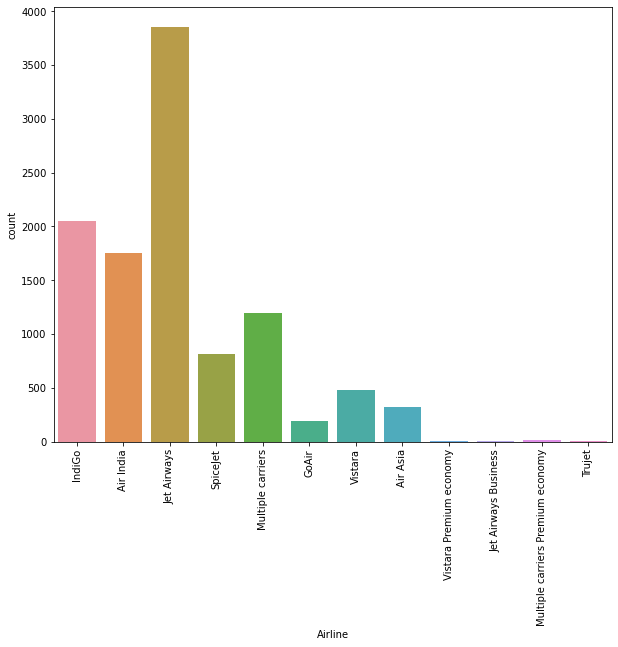

In [72]:
plt.rcParams["figure.figsize"] = (10,8)
sns.countplot(x='Airline',data=x)
plt.xticks(rotation=90)
plt.show()

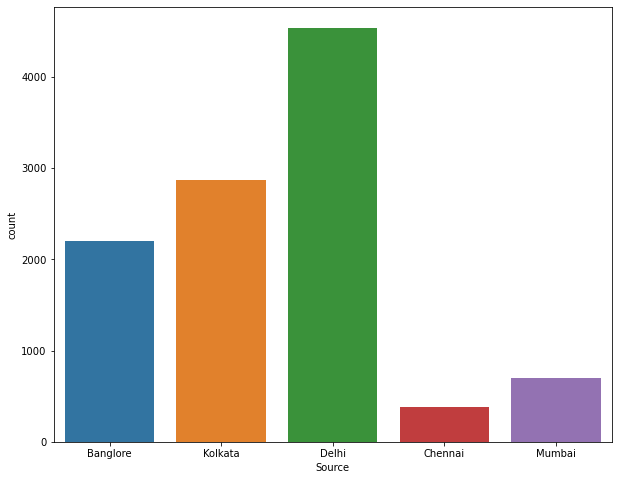

In [76]:
sns.countplot(x='Source',data=x)
#plt.xticks(rotation=90)
plt.show()

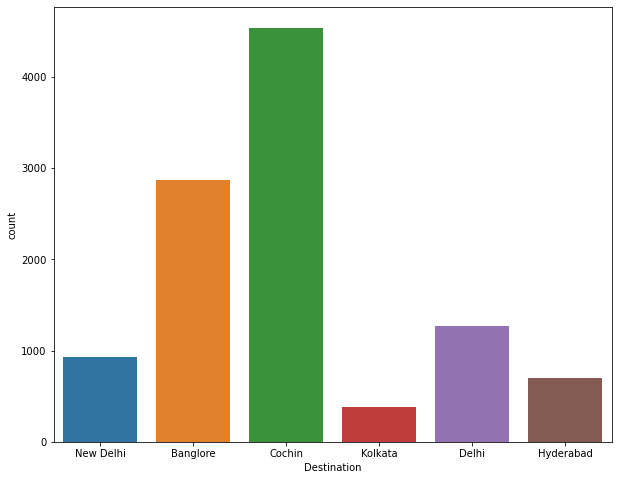

In [77]:
sns.countplot(x='Destination',data=x)
#plt.xticks(rotation=90)
plt.show()

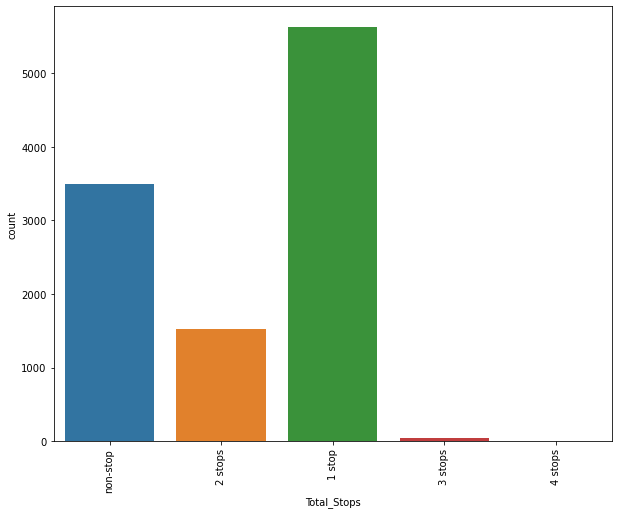

In [78]:
sns.countplot(x='Total_Stops',data=x)
plt.xticks(rotation=90)
plt.show()

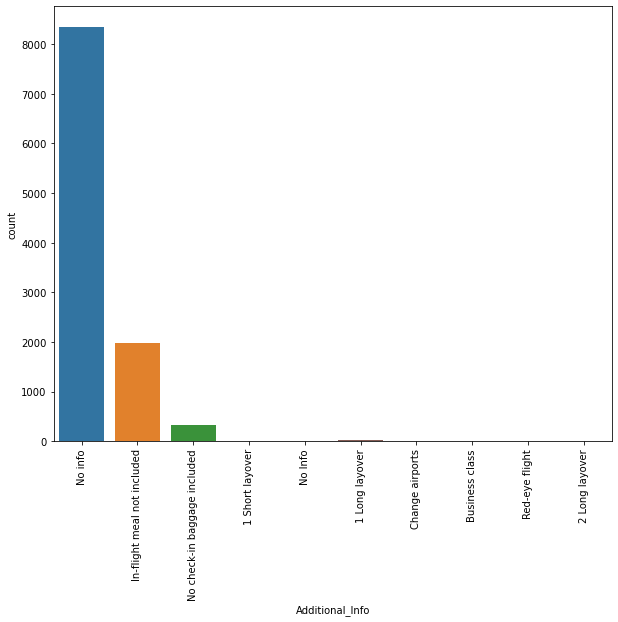

In [79]:
sns.countplot(x='Additional_Info',data=x)
plt.xticks(rotation=90)
plt.show()

In [82]:
x['Price'].max()

79512.0

In [83]:
x['Price'].min()

1759.0

In [84]:
x['Price'].mean()

9086.292735442801

In [85]:
x['Month'].value_counts()

5    3466
6    3414
3    2723
4    1079
Name: Month, dtype: int64

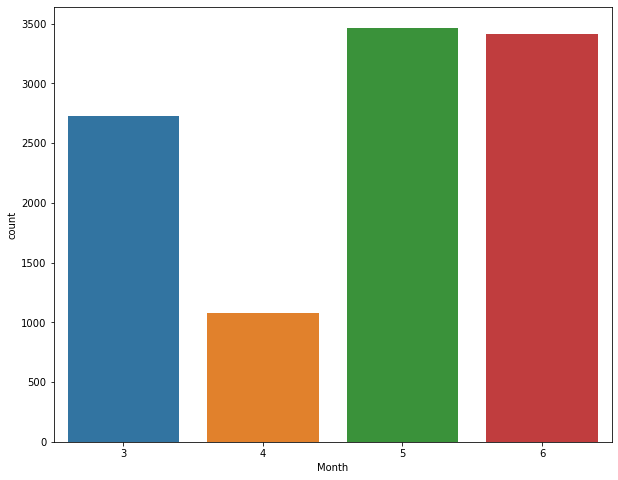

In [86]:
sns.countplot(x='Month',data=x)
#plt.xticks(rotation=90)
plt.show()

In [87]:
x['Arr_Hour'].value_counts()

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      490
23     485
10     476
8      471
7      417
20     377
16     369
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: Arr_Hour, dtype: int64

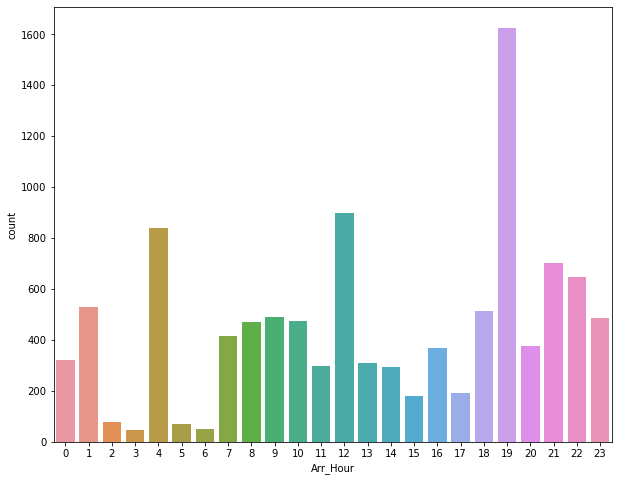

In [88]:
sns.countplot(x='Arr_Hour',data=x)
#plt.xticks(rotation=90)
plt.show()

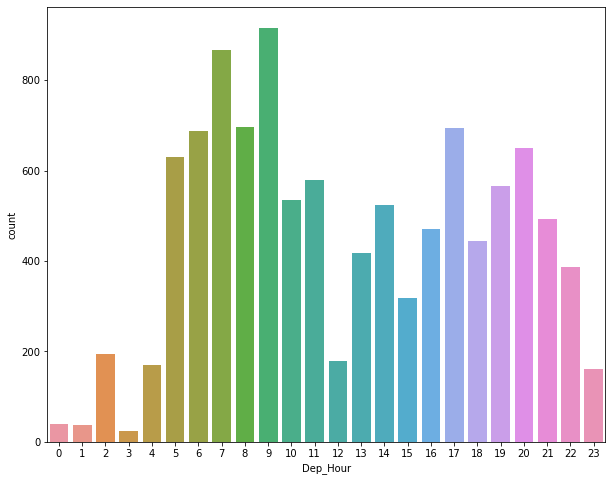

In [89]:
sns.countplot(x='Dep_Hour',data=x)
#plt.xticks(rotation=90)
plt.show()

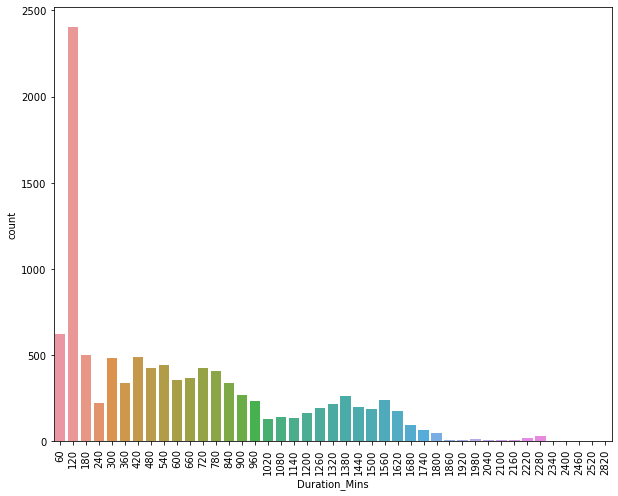

In [93]:
sns.countplot(x='Duration_Mins',data=x)
plt.xticks(rotation=90)
plt.show()

In [94]:
x.columns

Index(['index', 'Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Arr_Hour', 'Arr_Min',
       'Dep_Hour', 'Dep_Min', 'Duration_Mins', 'Airline_le', 'Source_le',
       'Destination_le', 'Total_Stops_le', 'Additional_Info_le'],
      dtype='object')

In [95]:
x.drop(['index','Airline','Source','Destination','Total_Stops','Additional_Info','Price'],axis=1,inplace=True)
x.head()

,Date,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Mins,Airline_le,Source_le,Destination_le,Total_Stops_le,Additional_Info_le
0,24,3,1,10,22,20,120,3,0,5,4,8
1,1,5,13,15,5,50,420,1,3,0,1,8
2,9,6,4,25,9,25,1140,4,2,1,1,8
3,12,5,23,30,18,5,300,3,3,0,0,8
4,1,3,21,35,16,50,240,3,0,5,0,8


In [96]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date                10682 non-null  int32
 1   Month               10682 non-null  int32
 2   Arr_Hour            10682 non-null  int32
 3   Arr_Min             10682 non-null  int32
 4   Dep_Hour            10682 non-null  int32
 5   Dep_Min             10682 non-null  int32
 6   Duration_Mins       10682 non-null  int32
 7   Airline_le          10682 non-null  int32
 8   Source_le           10682 non-null  int32
 9   Destination_le      10682 non-null  int32
 10  Total_Stops_le      10682 non-null  int32
 11  Additional_Info_le  10682 non-null  int32
dtypes: int32(12)
memory usage: 500.8 KB


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lin_reg = lr.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print(y_pred,y_test)

[ 9506.70964148 10543.64423318 11478.68111382 ...  4528.46180853
  8672.3791045  15235.19299976] 6075    16655.0
3544     4959.0
9290     9187.0
5032     3858.0
2483    12898.0
         ...   
3022    13555.0
8416     7229.0
2605     3419.0
1392     5797.0
8535    25735.0
Name: Price, Length: 2671, dtype: float64


In [100]:
reg.score(X, y)

NameError: name 'reg' is not defined